In [56]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import itertools
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('cleaned_lending_club_data.csv')
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,open_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,default
0,10000.0,36,11.44,329.48,4,10,117000.0,0,26.24,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,5,4,65000.0,0,22.05,17.0,...,0,0,0,0,1,0,0,0,0,0
2,15600.0,36,10.49,506.97,3,0,43057.0,1,12.79,13.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,2,6,54000.0,0,2.60,6.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,5,9,55000.0,1,33.95,13.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337394,6000.0,36,13.11,202.49,4,5,64000.0,0,10.81,7.0,...,0,0,0,0,0,0,0,0,1,0
337395,10000.0,60,10.99,217.38,4,2,40000.0,1,15.63,6.0,...,0,0,0,0,0,0,0,0,1,0
337396,21000.0,36,12.29,700.42,1,5,110000.0,1,21.45,6.0,...,0,0,0,0,1,0,0,0,0,0
337397,5000.0,36,9.99,161.32,1,10,56500.0,1,17.56,15.0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Divided by 2 because 300k is a lot to work with; some models did not generate results before
df_sampled = df.sample(frac=0.5, random_state=42)  # Randomly sample 50% of the data

In [4]:
# Brief summary of the dataset
df_sampled.describe()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,open_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,default
count,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,1.687000e+05,168700.000000,168700.000000,168700.000000,...,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000,168700.000000
mean,14534.983254,41.803248,13.796408,445.467077,2.968044,6.026941,7.595193e+04,0.679668,17.721685,11.605536,...,0.162899,0.080368,0.030421,0.007902,0.508814,0.000065,0.000089,0.092341,0.398684,0.197504
std,8395.455180,10.276230,4.512958,251.825911,1.406486,3.643041,6.929750e+04,0.466605,8.186272,5.188233,...,0.369274,0.271862,0.171743,0.088539,0.499924,0.008075,0.009429,0.289508,0.489629,0.398117
min,1000.000000,36.000000,5.320000,30.120000,1.000000,0.000000,5.000000e+03,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.640000,263.772500,2.000000,3.000000,4.700000e+04,0.000000,11.620000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12500.000000,36.000000,13.440000,389.030000,3.000000,6.000000,6.500000e+04,1.000000,17.250000,11.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,36.000000,16.780000,583.890000,4.000000,10.000000,9.000000e+04,1.000000,23.400000,14.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,60.000000,30.990000,1527.000000,5.000000,10.000000,8.706582e+06,1.000000,380.530000,76.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


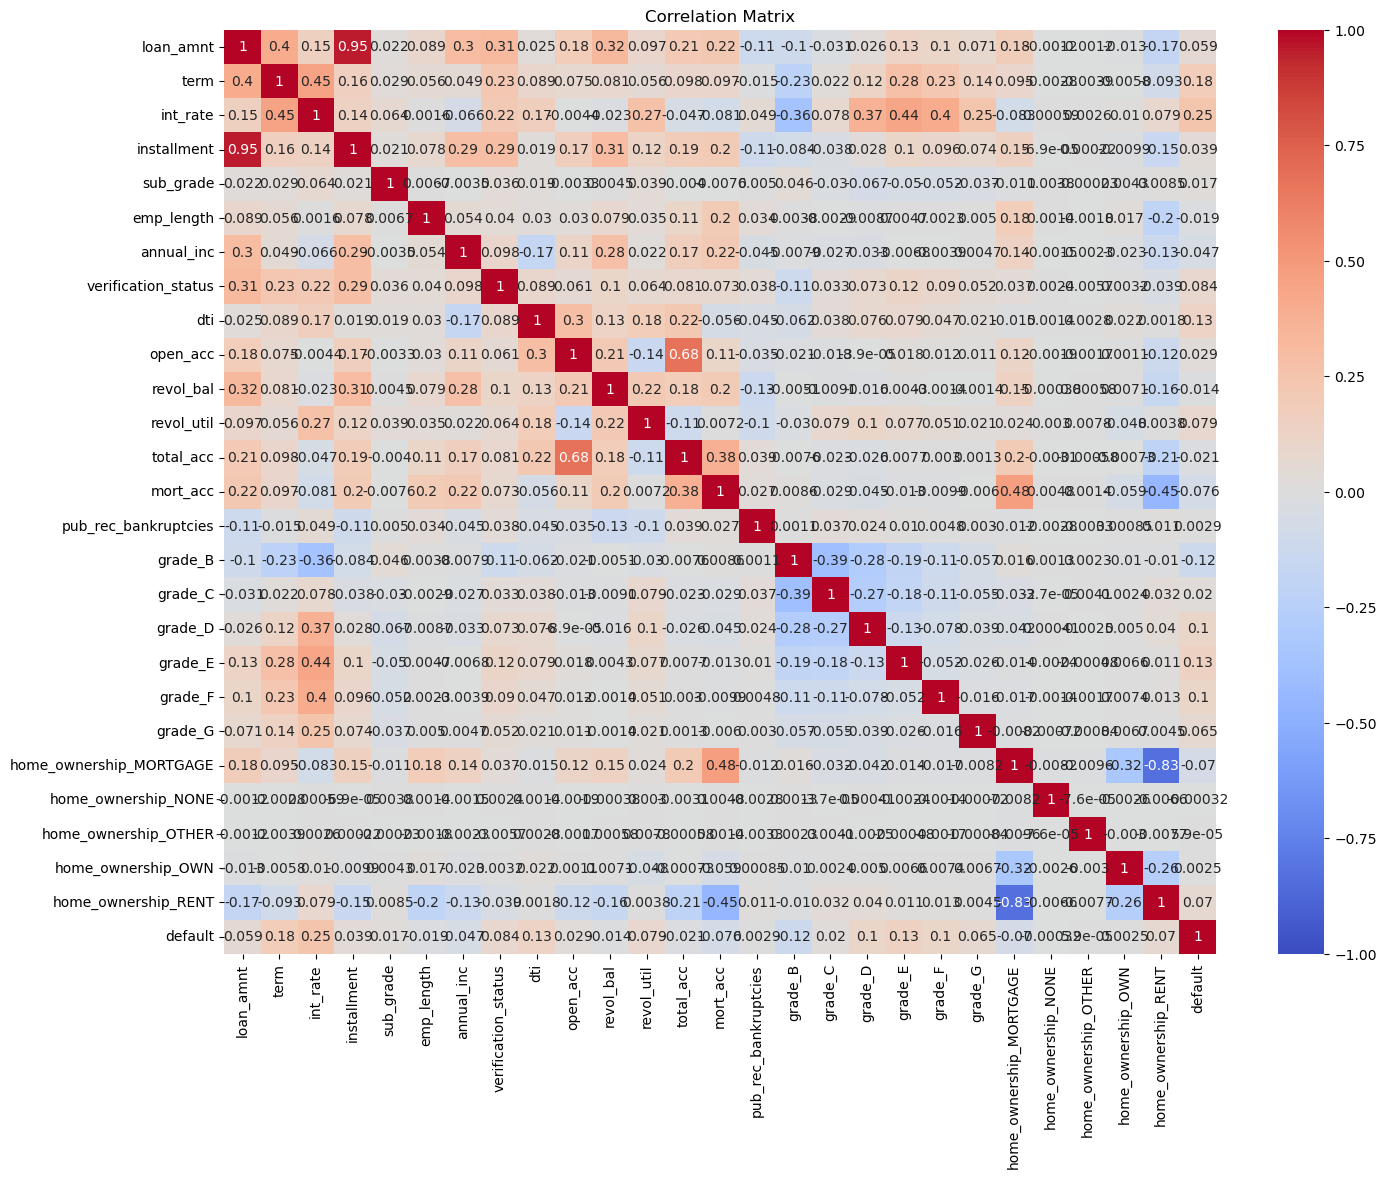

In [5]:
# Correlation matrix to check the correlation between the variables; variables with high correlation rate will be dropped
corr_matrix = df_sampled.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Just to give us the perspective on the outliers based on annual income
top_n_rows = df.nlargest(20, 'annual_inc')
top_n_rows

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,open_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,default
262877,8000.0,36,13.66,272.11,3,10,8706582.0,1,0.11,11.0,...,0,0,0,0,1,0,0,0,0,1
271045,10000.0,36,6.89,308.27,3,3,7600000.0,1,0.09,18.0,...,0,0,0,0,1,0,0,0,0,0
85649,20000.0,36,7.62,623.23,3,5,7446395.0,1,0.13,10.0,...,0,0,0,0,0,0,0,0,1,0
320553,14825.0,36,13.11,500.30,4,10,7141778.0,1,0.25,17.0,...,0,0,0,0,1,0,0,0,0,0
86127,25000.0,36,6.89,770.68,3,6,7000000.0,1,0.24,22.0,...,0,0,0,0,1,0,0,0,0,0
100323,25000.0,60,8.39,511.59,1,10,6500000.0,1,0.25,19.0,...,0,0,0,0,1,0,0,0,0,1
13837,30000.0,36,12.12,998.15,3,10,6100000.0,1,0.22,8.0,...,0,0,0,0,1,0,0,0,0,0
333585,4475.0,36,7.89,140.01,5,10,6000000.0,1,0.16,4.0,...,0,0,0,0,1,0,0,0,0,0
263019,35000.0,36,15.31,1218.61,2,10,5000000.0,1,2.36,13.0,...,0,0,0,0,1,0,0,0,0,0
189234,15600.0,36,7.69,486.62,4,8,4900000.0,0,0.11,13.0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# Calculate Z-scores for the 'annual_inc' column
df_sampled['z_score'] = (df_sampled['annual_inc'] - df_sampled['annual_inc'].mean()) / df_sampled['annual_inc'].std()

# Set threshold for Z-score 
threshold = 3

# Dropping rows where the Z-score is above or lower the threshold
df_sampled = df_sampled[(df_sampled['z_score'] < threshold) & (df_sampled['z_score'] > -threshold)]

# Drop the Z-score column 
df_sampled = df_sampled.drop(columns=['z_score'])

print("Data without outliers:")
df_sampled

Data without outliers:


,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,open_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,default
64825,11200.0,36,9.67,359.66,1,6,55494.0,1,7.01,6.0,...,0,0,0,0,1,0,0,0,0,0
99274,9100.0,36,10.15,294.28,2,1,40000.0,0,8.31,7.0,...,0,0,0,0,0,0,0,0,1,1
42613,13800.0,36,14.33,473.87,2,2,110000.0,1,7.75,10.0,...,0,0,0,0,0,0,0,0,1,0
217148,8000.0,36,6.62,245.63,2,2,49000.0,1,2.19,11.0,...,0,0,0,0,0,0,0,0,1,0
16234,7300.0,36,9.67,234.43,1,2,35000.0,0,19.27,9.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209794,10000.0,36,17.10,357.03,5,2,103000.0,1,3.82,13.0,...,0,0,0,0,0,0,0,0,1,0
247737,10000.0,36,8.19,314.25,5,10,76500.0,1,9.60,10.0,...,0,0,0,0,0,0,0,0,1,0
96056,10975.0,36,16.24,387.16,5,10,54000.0,0,17.80,9.0,...,0,0,0,0,0,0,0,0,1,1
131764,18000.0,36,9.67,578.03,1,10,125670.0,1,18.43,11.0,...,0,0,0,0,0,0,0,1,0,1


In [8]:
# Brief summary of updated dataset
df_sampled.describe()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,dti,open_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,default
count,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,...,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000,167609.000000
mean,14462.823745,41.805512,13.801835,443.167848,2.967943,6.026132,73422.797033,0.677953,17.777518,11.594139,...,0.163070,0.080443,0.030464,0.007870,0.507801,0.000066,0.000089,0.092274,0.399764,0.197925
std,8341.197572,10.277594,4.510718,249.749348,1.406380,3.643379,38258.961874,0.467262,8.169700,5.180819,...,0.369431,0.271979,0.171860,0.088361,0.499941,0.008101,0.009460,0.289414,0.489851,0.398436
min,1000.000000,36.000000,5.320000,30.120000,1.000000,0.000000,5000.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.740000,262.940000,2.000000,3.000000,47000.000000,0.000000,11.690000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12350.000000,36.000000,13.440000,388.060000,3.000000,6.000000,65000.000000,1.000000,17.310000,11.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,36.000000,16.780000,580.800000,4.000000,10.000000,90000.000000,1.000000,23.450000,14.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,60.000000,30.990000,1527.000000,5.000000,10.000000,283731.000000,1.000000,380.530000,76.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Dividing the annual income by 1000 for better interpretability 
df_sampled['annual_inc'] = df_sampled['annual_inc'] / 1000

In [10]:
# The number of NULL values in each column
df_sampled.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length                 0
annual_inc                 0
verification_status        0
dti                        0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
mort_acc                   0
pub_rec_bankruptcies       0
grade_B                    0
grade_C                    0
grade_D                    0
grade_E                    0
grade_F                    0
grade_G                    0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
default                    0
dtype: int64

In [11]:
# Here is the new subset of predictors which were dropped because:
# grade_B, grade_C, and etc. were dropped because of hard interpretability, and the same goes for subgrade
# installment and open_acc were dropped because of high correlation with other parameters
# So, we have p = 17 predictors left
X = df_sampled[['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'verification_status', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT']]
y = df_sampled['default']

In [12]:
# Splitting the dataset into training and testing subdatasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Just to make sure that splitting worked properly
X_train

,loan_amnt,term,int_rate,emp_length,annual_inc,verification_status,dti,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
22723,8000.0,36,13.35,4,25.000,0,12.24,4051.0,51.3,19.0,0.0,0.0,0,0,0,0,1
31969,12000.0,36,11.67,0,49.283,1,17.41,12051.0,18.3,28.0,0.0,0.0,0,0,0,0,1
227485,10850.0,36,17.86,1,26.500,0,18.48,23.0,0.6,33.0,1.0,0.0,0,0,0,0,1
306977,13000.0,36,13.35,4,68.000,1,31.01,20769.0,69.7,34.0,0.0,0.0,0,0,0,0,1
184696,9600.0,36,18.75,10,55.000,0,9.97,10537.0,87.1,18.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51920,20000.0,36,7.90,2,116.000,1,13.27,16447.0,44.1,34.0,1.0,0.0,1,0,0,0,0
312879,4500.0,36,15.41,0,15.500,1,38.34,2724.0,61.9,19.0,0.0,0.0,0,0,0,0,1
231370,5000.0,36,11.99,7,38.000,0,19.04,3174.0,40.7,6.0,0.0,0.0,0,0,0,0,1
201863,9600.0,36,8.18,2,59.000,1,28.78,15740.0,38.9,55.0,0.0,0.0,0,0,0,0,1


In [14]:
# Performing forward stepwise selection based on Linear Regression (further details are explained in paper)
model = LinearRegression()

forward = SequentialFeatureSelector(model, 
                                   n_features_to_select='auto', 
                                   direction='forward',          
                                   scoring='r2')                 

# Fitting the model with forward stepwise selection 
sf = forward.fit(X_train, y_train)

# Getting the selected predictors 
selected_predictors = X_train.columns[forward.get_support()] 

# Printing the list of selected predictors
print("Selected predictors:", selected_predictors.tolist())

Selected predictors: ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status', 'dti', 'mort_acc', 'home_ownership_RENT']


In [15]:
# Result of subset selection based on the Linear Regression 
selected_predictors_ols = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status', 'dti', 'mort_acc', 'home_ownership_RENT']

In [16]:
# Joining the selected predictors into a string with ' + ' separator
predictors = ' + '.join(selected_predictors_ols)

# Fitting an Ordinary Least Squares (OLS) regression model
results_ols = smf.ols(f'default ~ {predictors}', data=df_sampled).fit()

# The summary of the OLS Regression with obtained predictors
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:13:09   Log-Likelihood:                -76249.
No. Observations:              167609   AIC:                         1.525e+05
Df Residuals:                  167600   BIC:                         1.526e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2356    

In [17]:
# The optimal value for threshold is 0.35 based on the accuracy, precision and etc. scores
# Here, the linear regression gives us the continuous values so using the threshold we convert them into binary results
y_pred = results_ols.predict(X_test)
df_ols = pd.DataFrame(y_pred)
df_ols.columns = ['prob']
threshold = 0.35
df_ols['binary'] = (df_ols['prob'] >= threshold).astype(int)
df_ols

,prob,binary
136325,0.350540,1
244135,0.131424,0
286193,0.173891,0
53946,0.192534,0
140224,0.059850,0
...,...,...
18387,0.225047,0
85944,0.062416,0
289251,0.074320,0
48210,0.302539,0


In [20]:
# Confusion matrix
pred_ols = df_ols['binary'].to_list()
print(confusion_matrix(y_test, pred_ols))

[[24934  2040]
 [ 4966  1582]]


In [22]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, pred_ols)
precision = precision_score(y_test, pred_ols)
recall = recall_score(y_test, pred_ols)
f1 = f1_score(y_test, pred_ols)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7910029234532546
Precision: 0.4367752622860298
Recall: 0.24160048869883935
F1 Score: 0.3111111111111111


In [23]:
# Performing forward stepwise selection based on Linear Discriminant Analysis (further details are explained in paper)
model = LinearDiscriminantAnalysis()


forward = SequentialFeatureSelector(model, 
                                   n_features_to_select='auto', 
                                   direction='forward',          
                                   scoring='r2')                 
# Fitting the model with forward stepwise selection 
sf = forward.fit(X_train, y_train)

# Getting the selected predictors 
selected_predictors_lda = X_train.columns[forward.get_support()] 

# Printing the list of selected predictors
print("Selected predictors:", selected_predictors.tolist())

Selected predictors: ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status', 'dti', 'mort_acc', 'home_ownership_RENT']


In [24]:
# Result of selection based on the results of a Linear Discriminant Analysis
selected_predictors_lda = ['loan_amnt', 'term', 'verification_status', 'dti', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_RENT']

In [25]:
# Join the selected predictors into a string with ' + ' separator
predictors_lda = ' + '.join(selected_predictors_lda)

# Fitting a Logit regression model
results_logit = smf.logit(f'default ~ {predictors_lda}', data=df_sampled).fit()

# The summary of the Logit Regression with obtained predictors
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.470440
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               167609
Model:                          Logit   Df Residuals:                   167600
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                 0.05442
Time:                        14:14:41   Log-Likelihood:                -78850.
converged:                       True   LL-Null:                       -83388.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.8707      0.035   -109.391      0.000      -3.940   

In [26]:
# The optimal value for threshold is 0.35 based on the accuracy, precision and etc. scores
# Here, the logit regression gives us the continuous values so using the threshold we convert them into binary results
y_pred = results_logit.predict(X_test)
df_logit = pd.DataFrame(y_pred)
df_logit.columns = ['prob']
threshold = 0.35
df_logit['binary'] = (df_logit['prob'] >= threshold).astype(int)
df_logit

,prob,binary
136325,0.349054,0
244135,0.106839,0
286193,0.141829,0
53946,0.180668,0
140224,0.142579,0
...,...,...
18387,0.253962,0
85944,0.125722,0
289251,0.163317,0
48210,0.218664,0


In [27]:
# Confusion matrix
pred_logit = df_logit['binary'].to_list()
print(confusion_matrix(y_test, pred_logit))

[[25287  1687]
 [ 5356  1192]]


In [28]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, pred_logit)
precision = precision_score(y_test, pred_logit)
recall = recall_score(y_test, pred_logit)
f1 = f1_score(y_test, pred_logit)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7898991706938727
Precision: 0.41403265022577285
Recall: 0.18204031765424558
F1 Score: 0.25289063328736605


In [57]:
# Decision tree classifier with depth = 3
clf_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [58]:
# Text representation of the tree
print(export_text(clf_3,
                  feature_names=X.columns,
                  class_names=['No', 'Yes'],
                  show_weights=True))

|--- int_rate <= 13.14
|   |--- int_rate <= 9.16
|   |   |--- int_rate <= 6.65
|   |   |   |--- weights: [7388.00, 267.00] class: No
|   |   |--- int_rate >  6.65
|   |   |   |--- weights: [19142.00, 1549.00] class: No
|   |--- int_rate >  9.16
|   |   |--- dti <= 15.57
|   |   |   |--- weights: [20532.00, 2497.00] class: No
|   |   |--- dti >  15.57
|   |   |   |--- weights: [24200.00, 4522.00] class: No
|--- int_rate >  13.14
|   |--- term <= 48.00
|   |   |--- dti <= 23.55
|   |   |   |--- weights: [30520.00, 7924.00] class: No
|   |   |--- dti >  23.55
|   |   |   |--- weights: [10837.00, 4353.00] class: No
|   |--- term >  48.00
|   |   |--- int_rate <= 16.39
|   |   |   |--- weights: [8125.00, 3058.00] class: No
|   |   |--- int_rate >  16.39
|   |   |   |--- weights: [13691.00, 9004.00] class: No



In [59]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, clf_3.predict(X_test))
conf_matrix_tree

array([[26974,     0],
       [ 6548,     0]])

In [60]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, clf_3.predict(X_test))
precision = precision_score(y_test, clf_3.predict(X_test))
recall = recall_score(y_test, clf_3.predict(X_test))
f1 = f1_score(y_test, clf_3.predict(X_test))

print('Evaluation of Decision Tree Classifier with depth = 3')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# We can clearly see that the depth = 3 is too shallow for our dataset
# Next, we will try the same with larger depth

Evaluation of Decision Tree Classifier with depth = 3
Accuracy: 0.804665592745063
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/bekas/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
# Decision tree classifier with depth = 5
clf_5 = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state = 0)
clf_5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [62]:
# Text representation of the tree
print(export_text(clf_5,
                  feature_names=X.columns,
                  class_names=['No', 'Yes'],
                  show_weights=True))

|--- int_rate <= 13.14
|   |--- int_rate <= 9.16
|   |   |--- int_rate <= 6.65
|   |   |   |--- annual_inc <= 36.64
|   |   |   |   |--- revol_util <= 28.90
|   |   |   |   |   |--- weights: [217.00, 12.00] class: No
|   |   |   |   |--- revol_util >  28.90
|   |   |   |   |   |--- weights: [98.00, 18.00] class: No
|   |   |   |--- annual_inc >  36.64
|   |   |   |   |--- int_rate <= 6.13
|   |   |   |   |   |--- weights: [3760.00, 94.00] class: No
|   |   |   |   |--- int_rate >  6.13
|   |   |   |   |   |--- weights: [3313.00, 143.00] class: No
|   |   |--- int_rate >  6.65
|   |   |   |--- dti <= 17.26
|   |   |   |   |--- loan_amnt <= 3812.50
|   |   |   |   |   |--- weights: [503.00, 10.00] class: No
|   |   |   |   |--- loan_amnt >  3812.50
|   |   |   |   |   |--- weights: [11035.00, 763.00] class: No
|   |   |   |--- dti >  17.26
|   |   |   |   |--- home_ownership_RENT <= 0.50
|   |   |   |   |   |--- weights: [5231.00, 469.00] class: No
|   |   |   |   |--- home_ownership_REN

In [63]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, clf_5.predict(X_test))
conf_matrix_tree

array([[26512,   462],
       [ 6066,   482]])

In [64]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, clf_5.predict(X_test))
precision = precision_score(y_test, clf_5.predict(X_test))
recall = recall_score(y_test, clf_5.predict(X_test))
f1 = f1_score(y_test, clf_5.predict(X_test))

print('Evaluation of Decision Tree Clasifier with depth = 5')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Increasing the depth value made the model significantly better, let's try depth = 10

Evaluation of Decision Tree Clasifier with depth = 5
Accuracy: 0.8052622158582423
Precision: 0.510593220338983
Recall: 0.07361026267562615
F1 Score: 0.12867058195408435


In [65]:
# Classification tree
clf_10 = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state = 0)
clf_10.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [66]:
# Text representation of the tree
# However, this was done just for the sake of doing, the results are not comprehensible in this format
print(export_text(clf_10,
                  feature_names=X.columns,
                  class_names=['No', 'Yes'],
                  show_weights=True))

|--- int_rate <= 13.14
|   |--- int_rate <= 9.16
|   |   |--- int_rate <= 6.65
|   |   |   |--- annual_inc <= 36.64
|   |   |   |   |--- revol_util <= 28.90
|   |   |   |   |   |--- annual_inc <= 36.20
|   |   |   |   |   |   |--- revol_bal <= 6404.50
|   |   |   |   |   |   |   |--- revol_bal <= 6348.00
|   |   |   |   |   |   |   |   |--- verification_status <= 0.50
|   |   |   |   |   |   |   |   |   |--- total_acc <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [79.00, 0.00] class: No
|   |   |   |   |   |   |   |   |   |--- total_acc >  29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [19.00, 2.00] class: No
|   |   |   |   |   |   |   |   |--- verification_status >  0.50
|   |   |   |   |   |   |   |   |   |--- loan_amnt <= 5100.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [13.00, 6.00] class: No
|   |   |   |   |   |   |   |   |   |--- loan_amnt >  5100.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [47.00, 2.00] class: No
|   |   

In [67]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, clf_10.predict(X_test))
conf_matrix_tree

array([[26542,   432],
       [ 5860,   688]])

In [68]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, clf_10.predict(X_test))
precision = precision_score(y_test, clf_10.predict(X_test))
recall = recall_score(y_test, clf_10.predict(X_test))
f1 = f1_score(y_test, clf_10.predict(X_test))

print('Evaluation of Decision Tree Classifier with depth = 10')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation of Decision Tree Classifier with depth = 10
Accuracy: 0.8123023685937594
Precision: 0.6142857142857143
Recall: 0.10507025045815516
F1 Score: 0.1794470526864893


In [69]:
# Now, we will try the Random Forest Regressor
# Random forests: using 17 features
random_forest = RandomForestRegressor(max_features = 17, random_state = 0)
random_forest.fit(X_train, y_train)

# Predictions on test dataset
randforest = random_forest.predict(X_test)
randforest

array([0.36, 0.08, 0.24, ..., 0.13, 0.17, 0.1 ])

In [70]:
# The model gives us the continuous values (as they are probabilities), so we have to convert them based on some threshold
# Here, the threshold is the same, 0.35
rf_pred = random_forest.predict(X_test)
df_rf = pd.DataFrame(rf_pred)
df_rf.columns = ['prob']
threshold = 0.35
df_rf['binary'] = (df_rf['prob'] >= threshold).astype(int)
df_rf

,prob,binary
0,0.36,1
1,0.08,0
2,0.24,0
3,0.24,0
4,0.08,0
...,...,...
33517,0.16,0
33518,0.09,0
33519,0.13,0
33520,0.17,0


In [71]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, df_rf['binary'])
conf_matrix_tree

array([[23055,  3919],
       [ 4239,  2309]])

In [73]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, df_rf['binary'])
precision = precision_score(y_test, df_rf['binary'])
recall = recall_score(y_test, df_rf['binary'])
f1 = f1_score(y_test, df_rf['binary'])

print('Evaluation of Random Forest Regressor')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation of Random Forest Regressor
Accuracy: 0.7566374321341208
Precision: 0.37074502247912655
Recall: 0.3526267562614539
F1 Score: 0.3614589855979962


In [74]:
# The last but not least, we will try the Random Forest Classifier
# Random forests: using 17 features
random_forest_cl = RandomForestClassifier(max_features = 17, random_state = 0)
random_forest_cl.fit(X_train, y_train)

# Predictions on test dataset
randforest_cl = random_forest_cl.predict(X_test)
randforest_cl

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
# Confustion matrix
conf_matrix = confusion_matrix(y_test, randforest_cl)
conf_matrix

array([[26283,   691],
       [ 5973,   575]])

In [76]:
# The summary of how well the model predicted the values
accuracy = accuracy_score(y_test, randforest_cl)
precision = precision_score(y_test, randforest_cl)
recall = recall_score(y_test, randforest_cl)
f1 = f1_score(y_test, randforest_cl)

print('Evaluation of Random Forest Classifier')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation of Random Forest Classifier
Accuracy: 0.8012051786886224
Precision: 0.4541864139020537
Recall: 0.08781307269395235
F1 Score: 0.14717174302533914
